In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.signal import spectrogram
from scipy.signal import get_window
from sdas.tests.LoadSdasData import LoadSdasData
from sdas.tests.StartSdas import StartSdas

In [48]:
# Load and select data
shot = 35061
client = StartSdas()
V_data2, time = LoadSdasData(
    client, 'PCIE_ATCA_ADC_16.BOARD_2.CHANNEL_002', shot)


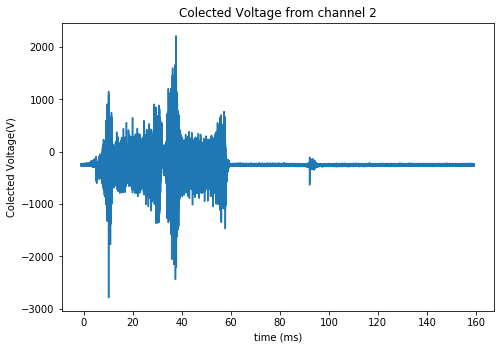

In [49]:
#Draw data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time/1000 , V_data2)
ax.set_xlabel('time (ms)')
ax.set_ylabel('Colected Voltage(V)')
ax.set_title('Colected Voltage from channel 2')
fig.savefig('Vcoil2.png',bbox_inches='tight',pad_inches=0.1)

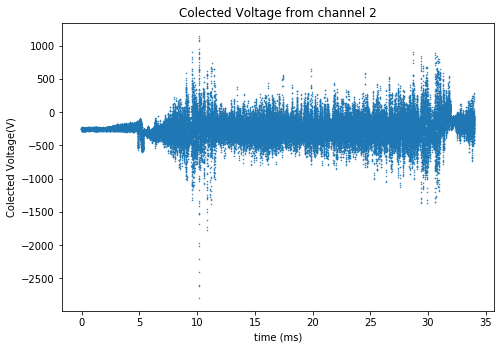

In [50]:
bool_indices = (time >-10) & (time < 34000)

V_data2 = V_data2[bool_indices]
time = time[bool_indices]

#Draw data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time/1000 , V_data2, '.',markersize=1)
ax.set_xlabel('time (ms)')
ax.set_ylabel('Colected Voltage(V)')
ax.set_title('Colected Voltage from channel 2')
fig.savefig('Vcoil2 zoom.png',bbox_inches='tight',pad_inches=0.1)

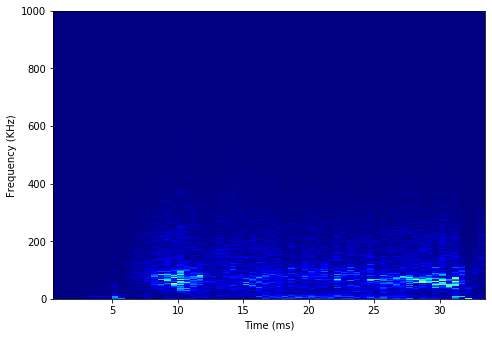

In [61]:
#Spectogram

fs=1/(0.000001*(time[1]-time[0])) #sampling frequency of the x time series
Nwindow= int(0.001*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=Nwindow/2   #lengh of the fft used
scalling='spectrum'  #between density and spectrum
mode= 'magnitude'      #what kind of values are returned psd complex magnitude angle phase

f,t,Sxx=spectrogram(V_data2,fs,window=window,nperseg=nperseg,noverlap=noverlap, scaling = scalling ,mode=mode)
#f=[f[i]for i in range(0,200)]
#Sxx=[Sxx[i] for i in range(0,200)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pcolormesh(t*1000,f/1000,Sxx,cmap='jet')
#ax.imshow(Sxx, cmap= 'jet',extent=(np.min(t)*1000,np.max(t)*1000,np.min(f)/1000,np.max(f)/1000),aspect='auto'), norm=LogNorm())
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Frequency (KHz)')
fig.savefig('Spectogram2.png',bbox_inches='tight',pad_inches=0.1)


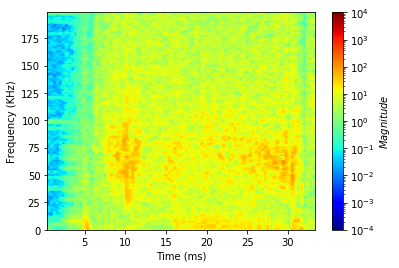

In [60]:
#Spectogram

fs=1/(0.000001*(time[1]-time[0])) #sampling frequency of the x time series
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=Nwindow  #lengh of the fft used
scalling='spectrum'  #between density and spectrum
mode= 'magnitude'      #what kind of values are returned psd complex magnitude angle phase

f,t,Sxx=spectrogram(V_data2,fs,window=window,nperseg=nperseg,noverlap=noverlap, scaling = scalling ,mode=mode)
f1=[f[i]for i in range(0,150)]
Sxx1=[Sxx[i] for i in range(150,0,-1)]
fig = plt.figure()
plt.imshow(Sxx1, cmap= 'jet',extent=(np.min(t)*1000,np.max(t)*1000,np.min(f1)/1000,np.max(f1)/1000),aspect='auto',interpolation='bilinear',norm=LogNorm(vmax=10000,vmin=0.0001))
plt.colorbar().set_label('$Magnitude$')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (KHz)')
fig.savefig('Spectogram.png',bbox_inches='tight',pad_inches=0.1)

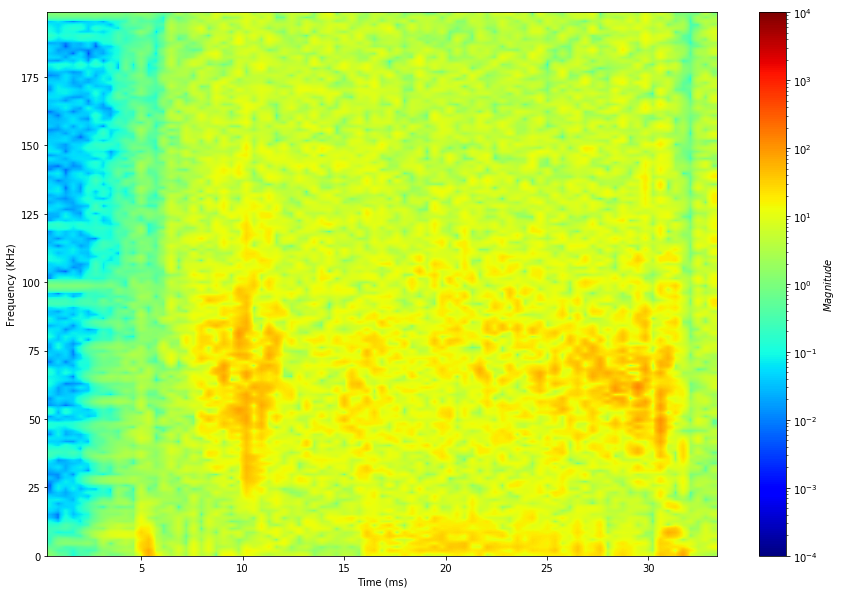

In [26]:
#Spectogram

fs=1/(0.000001*(time[1]-time[0])) #sampling frequency of the x time series
Nwindow= int(0.00075*fs)
window=get_window('hann',Nwindow,True)
nperseg= Nwindow  #int(1000*fs)   #lenght of each segment 
noverlap= nperseg*0.5  #number of points to overlap between segments
nfft=Nwindow/2  #lengh of the fft used
scalling='spectrum'  #between density and spectrum
mode= 'magnitude'      #what kind of values are returned psd complex magnitude angle phase

f,t,Sxx=spectrogram(V_data2,fs,window=window,nperseg=nperseg,noverlap=noverlap, scaling = scalling ,mode=mode)
f1=[f[i]for i in range(0,150)]
Sxx1=[Sxx[i] for i in range(150,0,-1)]
fig = plt.figure(figsize=(15,10))
plt.imshow(Sxx1, cmap= 'jet',extent=(np.min(t)*1000,np.max(t)*1000,np.min(f1)/1000,np.max(f1)/1000),aspect='auto',interpolation='bilinear',norm=LogNorm(vmax=10000,vmin=0.0001))
plt.colorbar().set_label('$Magnitude$')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (KHz)')
fig.savefig('Spectogram.png',bbox_inches='tight',pad_inches=0.1)

In [8]:
print(Nwindow)

1500


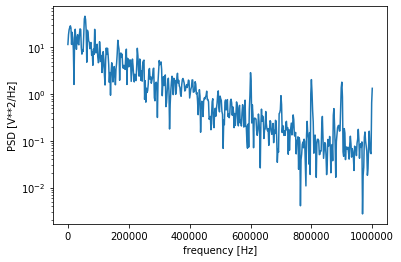

In [146]:
S=[Sxx[i][int(len(t)*26/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

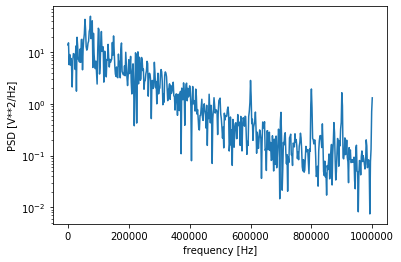

In [147]:
S=[Sxx[i][int(len(t)*27/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

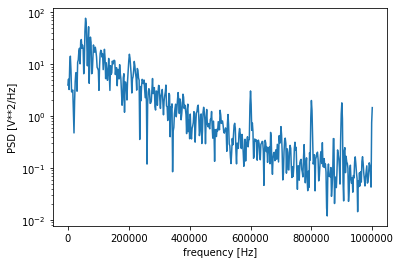

In [148]:
S=[Sxx[i][int(len(t)*28/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

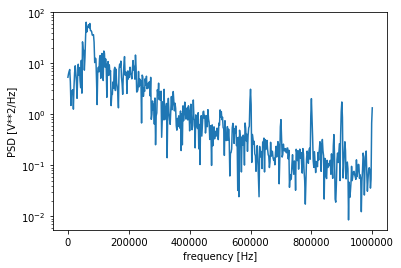

In [149]:
S=[Sxx[i][int(len(t)*29/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

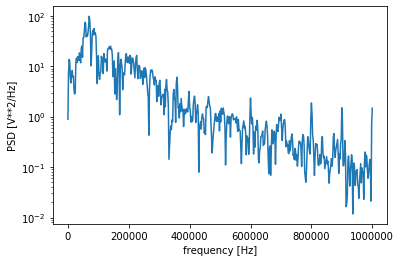

In [150]:
S=[Sxx[i][int(len(t)*30/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

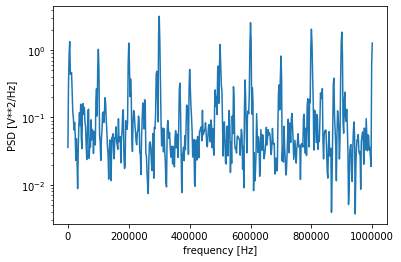

In [151]:
S=[Sxx[i][int(len(t)*1/32)] for i in range(0,len(f))]
plt.semilogy(f,S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()